In [1]:
import scipy.fft as fft
import mne
from matplotlib import pyplot as plt
import numpy as np

# Exploring the mean FFT across electrodes

Reading EGI MFF Header from /Users/samuel/Downloads/test_noise_60s_20240422_025708.mff...
    Reading events ...
    Assembling measurement info ...
Reading 0 ... 39971  =      0.000 ...   159.884 secs...


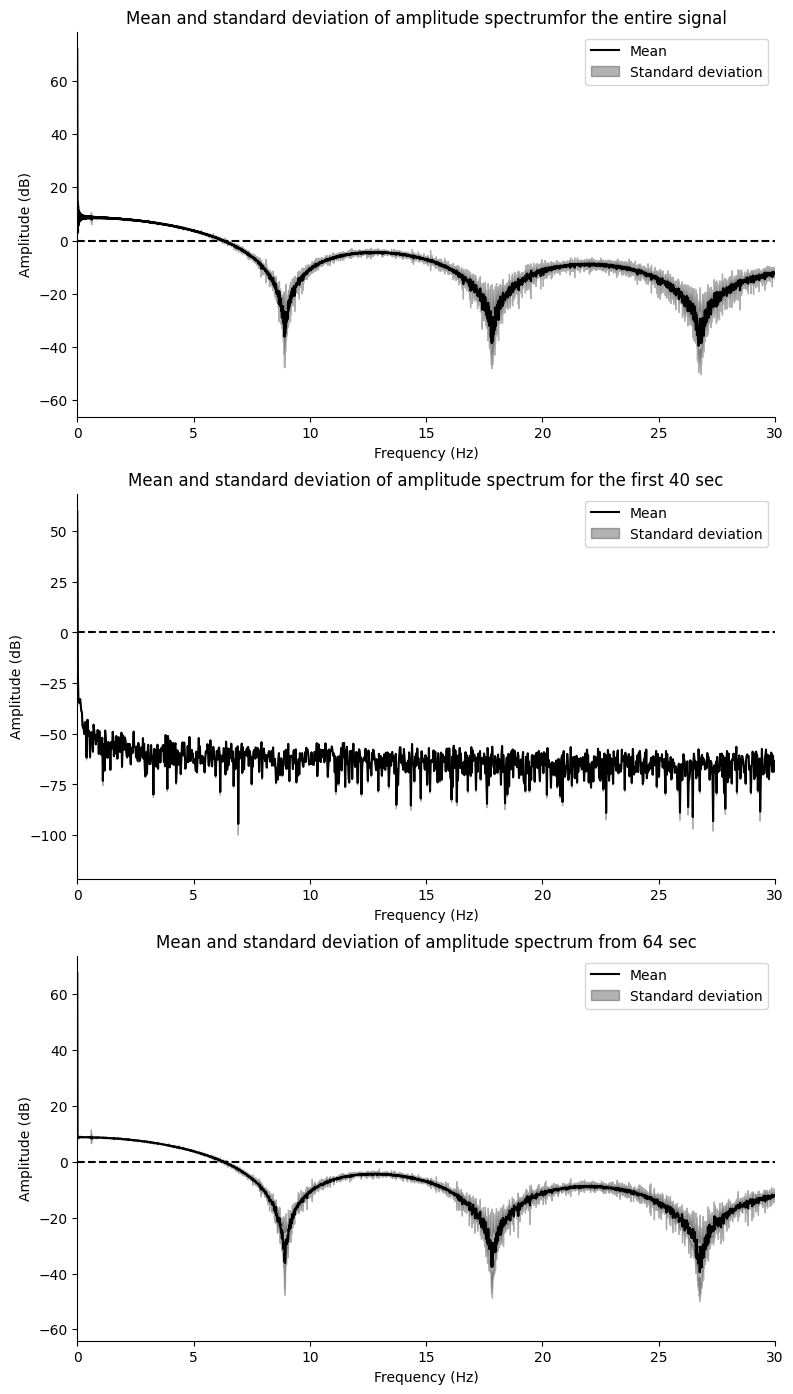

In [70]:
def plot_fft_signal(raw, 
                    min_freq=0,
                    max_freq=20,
                    title = 'Mean and standard deviation of amplitude spectrum'):
    signal = raw.copy().drop_channels(['VREF']).get_data()
    signal_fft = fft.fft(signal)
    amplitude_db = 20*np.log10(np.abs(signal_fft))
    averaged_amplitude_db = amplitude_db.mean(axis=0) #averaging over electrodes
    sd_amplitude_db = amplitude_db.std(axis=0)
    freqs = fft.fftfreq(signal.shape[1], 1/raw.info['sfreq'])

    # Because the FFT is symmetric, we only need the first half
    frequencies = freqs[:len(freqs)//2]
    averaged_amplitude_db = averaged_amplitude_db[:len(freqs)//2]
    sd_amplitude_db = sd_amplitude_db[:len(freqs)//2]


    plt.plot(frequencies, averaged_amplitude_db, label='Mean', color='black')
    plt.fill_between(frequencies, averaged_amplitude_db - sd_amplitude_db, 
                    averaged_amplitude_db + sd_amplitude_db, 
                    alpha=0.3,
                    label='Standard deviation',
                    color = 'black')
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.xlim(0, 30)
    plt.title(title)
    plt.legend()
    plt.gca().spines[['top', 'right']].set_visible(False)

fig = plt.figure(figsize=(9,17))
raw = mne.io.read_raw_egi('test_noise_60s_20240422_025708.mff', preload=True)
plt.subplot(311)
plot_fft_signal(raw.copy(), title='Mean and standard deviation of amplitude spectrumfor the entire signal')
plt.subplot(312)
plot_fft_signal(raw.copy().crop(0,40), title='Mean and standard deviation of amplitude spectrum for the first 40 sec', min_freq=20, max_freq=40)
plt.subplot(313)
plot_fft_signal(raw.copy().crop(64,None), title='Mean and standard deviation of amplitude spectrum from 64 sec', min_freq=20, max_freq=40)


## Remarks
The spectral signature that dominate is the noise generated by the LSL connection.
It has a specific shape though: it looks like there is a filtering done somewhere (and it looks exactly something like the impulse response of a pass-band ripple filter with a Keiser window)

# Explore the Power Spectral Density

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/var/folders/l3/myr9vj8933q4vwhkbvxcx6gc0000gn/T/ipykernel_30391/3510033404.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.copy().crop(0,40).drop_channels(['VREF']).plot_psd(fmin=0, fmax=30)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/var/folders/l3/myr9vj8933q4vwhkbvxcx6gc0000gn/T/ipykernel_30391/3510033404.py:3: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.copy().crop(64,None).drop_channels(['VREF']).plot_psd(fmin=0, fmax=30)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Text(0.5, 1.0, 'After connecting to LSL')

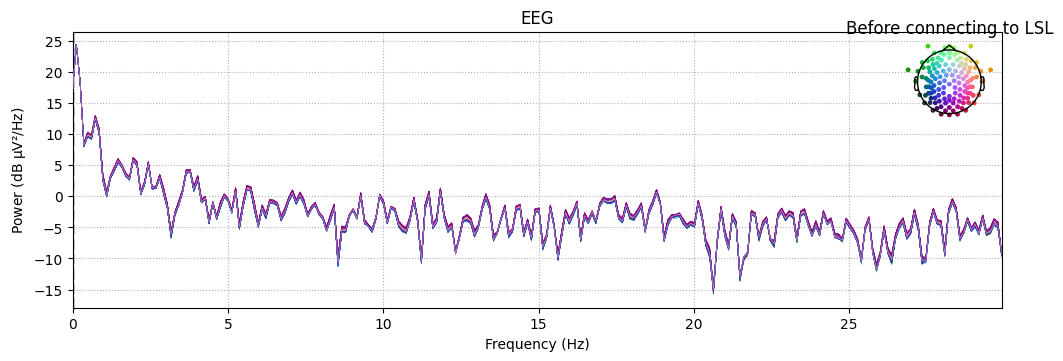

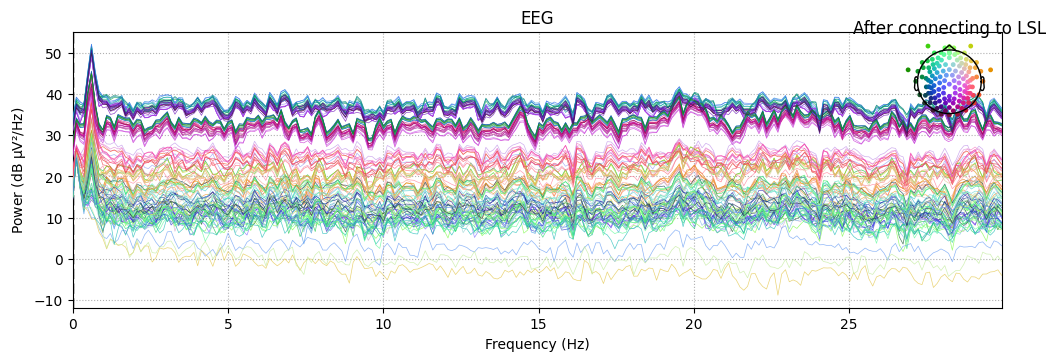

In [29]:
raw.copy().crop(0,40).plot_psd(fmin=0, fmax=30)
plt.title('Before connecting to LSL')
raw.copy().crop(64,None).plot_psd(fmin=0, fmax=30)
plt.title('After connecting to LSL')


# On human head

In [9]:
raw_human = mne.io.read_raw_egi('test_noise_20240424_014859.mff', preload=True)
raw_human.drop_channels(['VREF','E49'])
raw_human_before = raw_human.copy().crop(0,50)
raw_human_after = raw_human.copy().crop(50,None)

Reading EGI MFF Header from /Users/samuel/01_projects/eeg_research/src/eeg_research/labs/eeg_troubleshooting_harlem_MOBI/test_noise_20240424_014859.mff...
    Reading events ...
    Assembling measurement info ...
Reading 0 ... 30354  =      0.000 ...   121.416 secs...


## Explore power spectral density

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


/var/folders/l3/myr9vj8933q4vwhkbvxcx6gc0000gn/T/ipykernel_737/2855617458.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_human_before.plot_psd(0,30)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/var/folders/l3/myr9vj8933q4vwhkbvxcx6gc0000gn/T/ipykernel_737/2855617458.py:4: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_human_before.plot_psd(0,30, average=True)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/var/folders/l3/myr9vj8933q4vwhkbvxcx6gc0000gn/T/ipykernel_737/2855617458.py:6: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.

Plotting power spectral density (dB=True).


/var/folders/l3/myr9vj8933q4vwhkbvxcx6gc0000gn/T/ipykernel_737/2855617458.py:8: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_human_after.plot_psd(0,30, average=True)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


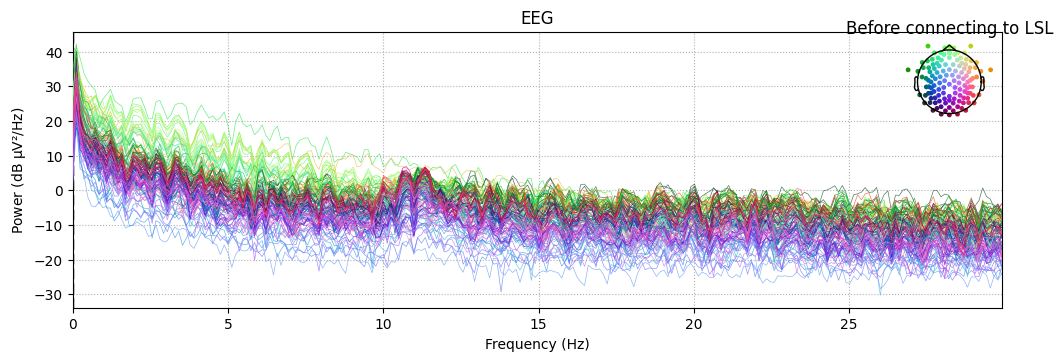

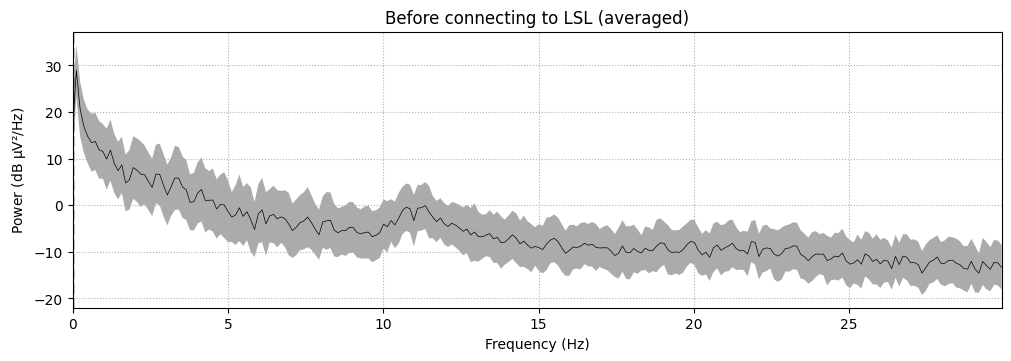

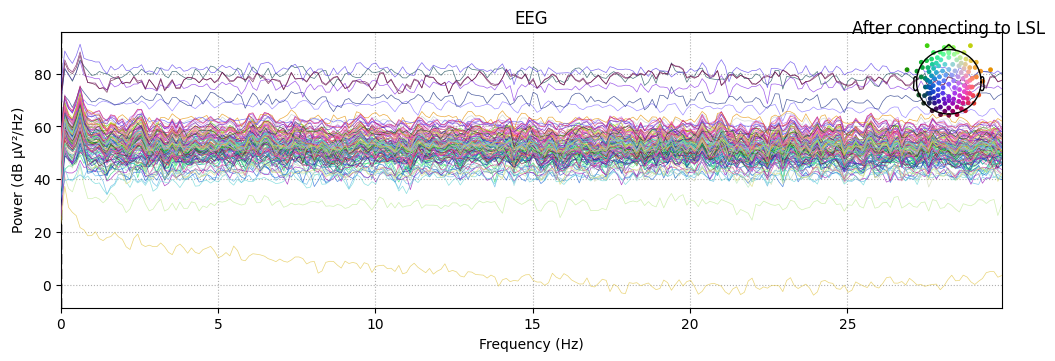

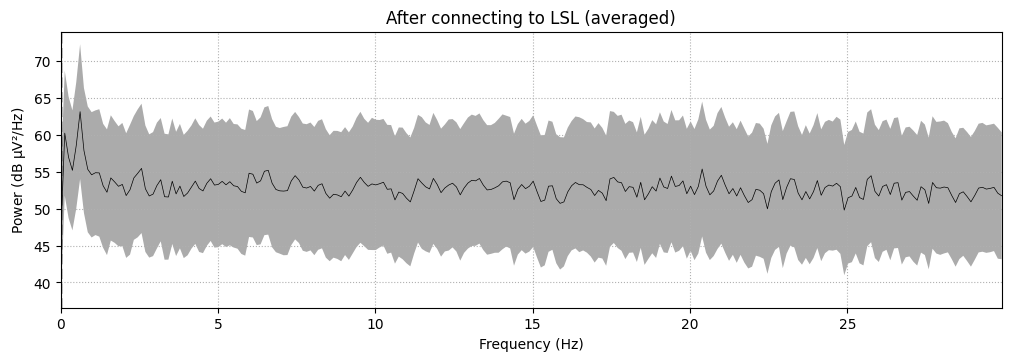

In [11]:
%matplotlib inline
raw_human_before.plot_psd(0,30)
plt.title('Before connecting to LSL')
raw_human_before.plot_psd(0,30, average=True)
plt.title('Before connecting to LSL (averaged)')
raw_human_after.plot_psd(0,30)
plt.title('After connecting to LSL')
raw_human_after.plot_psd(0,30, average=True)
plt.title('After connecting to LSL (averaged)')
plt.show()